In [73]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np

In [51]:
raw_data = pd.read_csv('datasets_723010_1257097_fatal-police-shootings-data.csv')

In [52]:
rows, columns = raw_data.shape
print(f'Rows: {rows}, Columns: {columns}')

Rows: 5416, Columns: 14


In [53]:
raw_data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

### looking for missing values

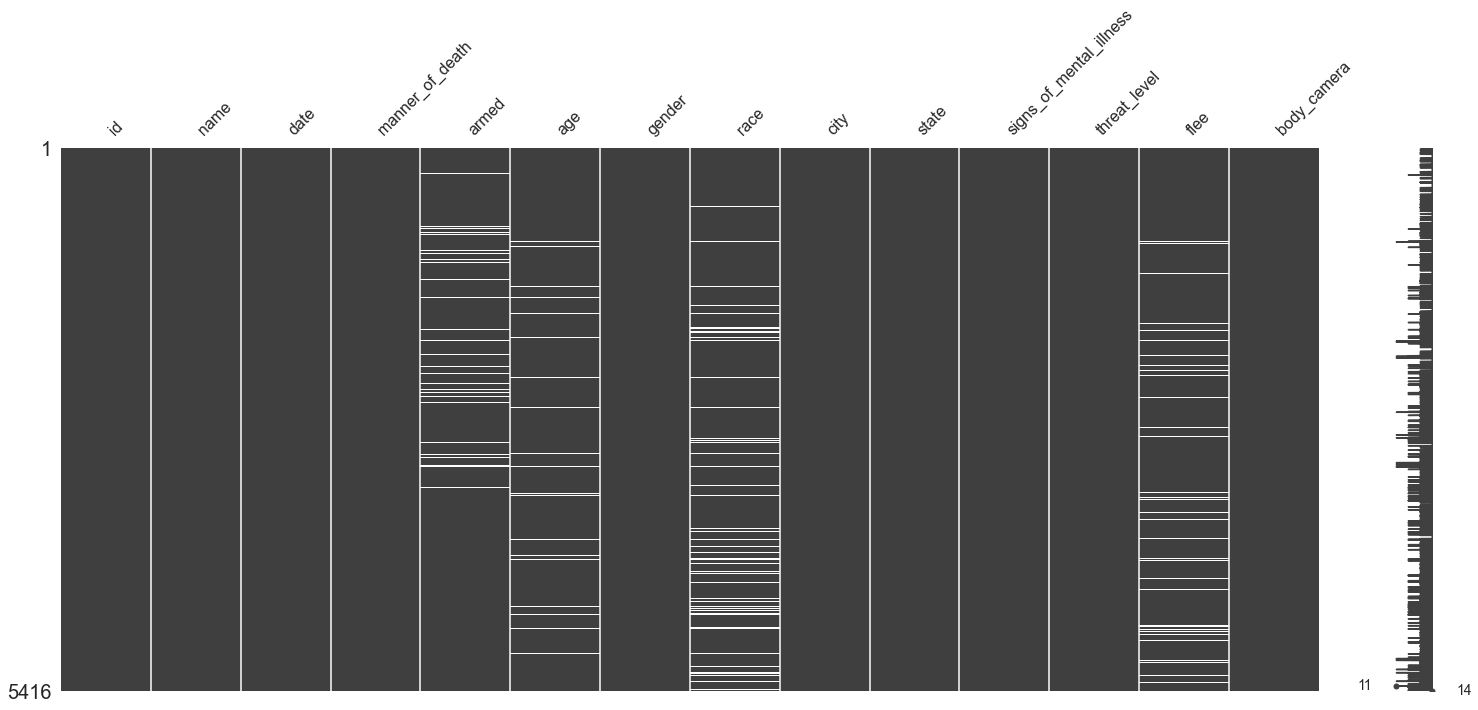

In [55]:
msno.matrix(raw_data)



In [56]:
missing_percentage= raw_data.isna().sum()*100/raw_data.shape[0]
missing_percentage

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
dtype: float64

How is less tan the 5% we can drop it

In [58]:
raw_data.dropna(inplace=True)

id                         0.0
name                       0.0
date                       0.0
manner_of_death            0.0
armed                      0.0
age                        0.0
gender                     0.0
race                       0.0
city                       0.0
state                      0.0
signs_of_mental_illness    0.0
threat_level               0.0
flee                       0.0
body_camera                0.0
dtype: float64

### I am looking for who race is more shooted by the police

In [ ]:

raw_data['race'].unique()
shoot = raw_data[raw_data['manner_of_death'] =='shot']

In [ ]:
p= px.histogram(shoot,x='race',color='race')
p.show()

### which number of people was unarmed in the shoots


In [ ]:
unarmed= raw_data[raw_data['armed']=='unarmed']
un = px.histogram(unarmed, x= 'race', color= 'race')
un.show()


### the top 10 of the most unfame police states

In [ ]:
states = raw_data['state'].value_counts()[:10]
states = pd.DataFrame(states)
states= states.reset_index()
st_pie = px.pie(states, values = 'state', names= 'index',color_discrete_sequence= px.colors.sequential.RdBu)
st_pie.show()

### age distribution of the people who were shot

In [ ]:
np.random.seed(1)
x= raw_data['age']
hist_data= [x]
group_lables = ['Age']
age = ff.create_distplot(hist_data, group_lables)
age.show()




